<img src="../../images/QISKit-c.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="250 px" align="left">

## _*Entanglement revisited*_ 

The latest version of this notebook is available on https://github.com/IBM/qiskit-sdk-py/tree/master/scripts.

For more information about how to use the Quantum Experience consult the [Quantum Experience tutorials](https://quantumexperience.ng.bluemix.net/qstage/#/tutorial?sectionId=c59b3710b928891a1420190148a72cce&pageIndex=0) or check-out the [community](https://quantumexperience.ng.bluemix.net/qstage/#/community).

***
### Contributors
Jay Gambetta, Antonio Córcoles

## Entanglement

In [superposition and entanglement](superposition_and_entanglement.ipynb) we introduced you to the quantum concept of entanglement. We made the quantum state $|\psi\rangle= (|00\rangle+|11\rangle)/\sqrt{2}$ and showed that (up to experimental noise) the system has perfect correlations in both the computation basis and the superpostion basis. This means that if $q_0$ is measured in state $|0\rangle$ then we know $q_1$ is in the same state, and furthermore if $q_0$ is measured in state $|+\rangle$ then we know $q_1$ is also in the same state.

To understand the implications of this in a little bit more detail lets introduce the concept of an observable. An observable is a Hermitian matrix where the real eigenvalues represent the outcome of the experiment and the eigenvectors are the states that the system is projected to under measurement. That is an observable $ A$ is given by
  

$$  A = \sum_j a_j|a_j\rangle\langle a_j|$$ 

where $|a_j\rangle$ is the eigenvector of the observable with result $a_j$. This expectation value of this observable is given by 

$$\langle  A \rangle  = \sum_j a_j |\langle \psi  |a_j\rangle|^2  = \sum_j a_j \mathrm{Pr}(a_j|\psi)$$

and we see there is the standard relationship between average (expectation value) and probability. 

For a two qubit system the following are important two-outcome ($\pm1$) single qubit observables  

$$ Z= |0\rangle\langle 0| - |1\rangle\langle 1|$$ 
$$ X= |+\rangle\langle +| - |-\rangle\langle -|$$ 

also commonly referred to as the Pauli $Z$ and $X$ operators. These can further be extended to the two-qubit space to give 

$$\langle  I\otimes  Z\rangle =\mathrm{Pr}(00|\psi) - \mathrm{Pr}(01|\psi) +  \mathrm{Pr}(10|\psi)- \mathrm{Pr}(11|\psi)$$ 
$$\langle  Z\otimes  I\rangle =\mathrm{Pr}(00|\psi) + \mathrm{Pr}(01|\psi) -  \mathrm{Pr}(10|\psi)- \mathrm{Pr}(11|\psi)$$ 
$$\langle  Z\otimes  Z\rangle =\mathrm{Pr}(00|\psi) - \mathrm{Pr}(01|\psi) -  \mathrm{Pr}(10|\psi)+ \mathrm{Pr}(11|\psi)$$ 

$$\langle  I\otimes  X\rangle =\mathrm{Pr}(++|\psi) - \mathrm{Pr}(+-|\psi) +  \mathrm{Pr}(-+|\psi)- \mathrm{Pr}(--|\psi)$$ 
$$\langle  X\otimes  I\rangle =\mathrm{Pr}(++|\psi) + \mathrm{Pr}(+-|\psi) -  \mathrm{Pr}(-+|\psi)- \mathrm{Pr}(--|\psi)$$ 
$$\langle  X\otimes  X\rangle =\mathrm{Pr}(++|\psi) - \mathrm{Pr}(+-|\psi) -  \mathrm{Pr}(-+|\psi)+ \mathrm{Pr}(--|\psi)$$ 


$$\langle  Z\otimes  X\rangle =\mathrm{Pr}(0+|\psi) - \mathrm{Pr}(0-|\psi) -  \mathrm{Pr}(1+|\psi)+ \mathrm{Pr}(1-|\psi)$$ 
$$\langle  X\otimes  Z\rangle =\mathrm{Pr}(+0|\psi) - \mathrm{Pr}(+1|\psi) -  \mathrm{Pr}(-0|\psi)+ \mathrm{Pr}(-1|\psi)$$ 

In [1]:
#Checking the version of PYTHON we only support 3 at the moment
import sys
if sys.version_info < (3,0):
    raise Exception("Please use Python version 3 or greater.")
    
#usefull additional packages 
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.linalg
%matplotlib inline
import time

import sys
sys.path.append("../../")
#importing the QISKit
from qiskit import QuantumProgram
import Qconfig

#import basic plot tools
from qiskit.basicplotter import plot_histogram

SyntaxError: invalid syntax (_quantumprogram.py, line 584)

Recall previously that to make the Bell state $|\psi\rangle= (|00\rangle+|11\rangle)/\sqrt{2}$ from the initial state $|00\rangle$, the quantum circuit first applies a Hadmard on $q_0$ followed by a CNOT from $q_0$ to $q_1$. On the Quantum Experience this can done by using the below script for measurement of the above expectation values where we run four different experiments with measurements in the standard basis, superposition basis, and a combination of both.

In [2]:
device = 'ibmqx2' # the device to run on
shots = 1024    #the number of shots in the experiment. 
# device = 'simulator' # the device test purpose

QPS_SPECS = {
    "name": "Entanglement",
    "circuits": [{
        "name": "bell",
        "quantum_registers": [{
            "name":"q",
            "size":2
        }],
        "classical_registers": [{
            "name":"c",
            "size":2
        }]}],
}

Q_program = QuantumProgram(specs=QPS_SPECS)
Q_program.set_api(Qconfig.APItoken, Qconfig.config["url"])

#quantum circuit to make bell state 
bell = Q_program.circuit("bell")
q = Q_program.quantum_registers("q")
c = Q_program.classical_registers('c')

bell.h(q[0])
bell.cx(q[0],q[1])

# quantum circuit to measure q in standard basis 
measureZZ = Q_program.create_circuit("measureZZ", ["q"], ["c"])
measureZZ.measure(q[0], c[0])
measureZZ.measure(q[1], c[1])

# quantum circuit to measure q in superposition basis 
measureXX = Q_program.create_circuit("measureXX", ["q"], ["c"])
measureXX.h(q[0])
measureXX.h(q[1])
measureXX.measure(q[0], c[0])
measureXX.measure(q[1], c[1])

# quantum circuit to measure ZX
measureZX = Q_program.create_circuit("measureZX", ["q"], ["c"])
measureZX.h(q[0])
measureZX.measure(q[0], c[0])
measureZX.measure(q[1], c[1])

# quantum circuit to measure XZ
measureXZ = Q_program.create_circuit("measureXZ", ["q"], ["c"])
measureXZ.h(q[1])
measureXZ.measure(q[0], c[0])
measureXZ.measure(q[1], c[1])

circuits = [bell+measureZZ, bell+measureZX, bell+measureXX, bell+measureXZ]

#ERROR print(Q_program.program_to_text())

results = Q_program.execute(circuits, device, shots, max_credits=3, wait=10, timeout=240)


>> quantum_registers created: q 2
>> classical_registers created: c 2
backend that is running ibmqx2
status = RUNNING (10 seconds)
status = RUNNING (20 seconds)


In [3]:
obsevableIZ ={'00000': 1, '00001': -1, '00010': 1, '00011': -1}
obsevableZI ={'00000': 1, '00001': 1, '00010': -1, '00011': -1}
obsevableZZ ={'00000': 1, '00001': -1, '00010': -1, '00011': 1}

obsevableIZ_ideal ={'00': 1, '01': -1, '10': 1, '11': -1}
obsevableZI_ideal ={'00': 1, '01': 1, '10': -1, '11': -1}
obsevableZZ_ideal ={'00': 1, '01': -1, '10': -1, '11': 1}

In [4]:
print("IZ = " + str(Q_program.average_data(0,obsevableIZ)))
print("ZI = " + str(Q_program.average_data(0,obsevableZI)))
print("ZZ = " + str(Q_program.average_data(0,obsevableZZ)))

print("IX = " + str(Q_program.average_data(2,obsevableIZ)))
print("XI = " + str(Q_program.average_data(2,obsevableZI)))
print("XX = " + str(Q_program.average_data(2,obsevableZZ)))

print("ZX = " + str(Q_program.average_data(1,obsevableZZ)))
print("XZ = " + str(Q_program.average_data(3,obsevableZZ)))

IZ = 0.0390625
ZI = 0.056640625
ZZ = 0.888671875
IX = 0.13671875
XI = 0.16796875
XX = 0.91015625
ZX = 0.01171875
XZ = 0.03125


Here we see that for the state $|\psi\rangle= (|00\rangle+|11\rangle)/\sqrt{2}$ that expectation values (within experimental errors) are


Observable    | Expected value |Observable    | Expected value|Observable    | Expected value
------------- | -------------  | ------------- | ------------- | ------------- | -------------
ZZ  | 1   |XX  | 1  | ZX  | 0 
ZI  | 0   |XI  | 0  | XZ  | 0
IZ  | 0   |IX  | 0  |   |

Now, can such a situation be properly explained? Here we can introduce the concept of a *hidden variable model*. If we assume there is a hidden variable $\lambda$ and then follow the following two assumptions 

* _Locality_: No information can travel faster than the speed of light. There is a hidden variable $\lambda$ that defines all the correlations so that  $$\langle A\otimes B\rangle = \sum_\lambda P(\lambda) A(\lambda) B(\lambda)$$ 
                      
* _Realism_: All observables have a definite value independent of the measurement ($A(\lambda)=\pm1$ etc).

then can we describe these observations? --- Well actually the answer is yes! 

Lets assume $\lambda$ has two bits each occurring randomly with probably 1/4 then the following predefined table would explain all the above observables

$\lambda$    | Z (qubit 1) |Z (qubit 2)    | X (qubit 1)| X (qubit 2)   
------------- | -------------  | ------------- | ------------- | ------------- 
00  | 1 | 1 | 1 | 1  
01  | 1 | 1 |-1 |-1  
10  |-1 |-1 |-1 |-1    
11  |-1 |-1 | 1 | 1  

Therefore with a purely classical hidden variable model, we are able to reconcile the measured observations we had for this particular Bell state. However, there are some states where this model will not hold. This was first observed by John Stewart Bell in 1964.  He proposed a theorem that suggests that there are no hidden variables in quantum mechanics. At the core of Bell's theorem is the famous Bell inequality. Here, we'll use a refined version of this inequality (known as the CHSH inequality, derived by John Clauser, Michael Horne, Abner Shimony, and Richard Holt in 1969) to demonstrate Bell's proposal.

## CHSH inequality 


In the CHSH inequality we measure the correlator of four observables: $A$ and $A'$ on $q_0$ and $B$ and $B'$ on $q_1$ which have eigenvalues $\pm 1$. The CHSH inequality says that no local hidden variable theory can have  

$$|C|>2$$ 

where 

$$C = \langle B\otimes A\rangle + \langle B\otimes A'\rangle+\langle B'\otimes A'\rangle-\langle B'\otimes A\rangle.$$

What would this look like with some hidden variable model under the locality and realism assumptions from above? Well then $C$ becomes 

$$C = \sum_\lambda P(\lambda) \{ B(\lambda) [ A(\lambda)+A'(\lambda)] + B'(\lambda) [ A'(\lambda)-A(\lambda)]$$
                      
and $[A(\lambda)+A'(\lambda)]=2$ (or 0) while $[A'(\lambda)-A(\lambda)]=0$ (or 2) respectively. That is, $|C|=2$, and noise will only make this smaller. 
 
This says that if we measure a number greater than 2 then the above assumptions cannot be valid. This test and thought process is precisely one of those astonishing counterintuitive ideas one must accept in the quantum world. For simplicity we choose these observables to be 

 $$C = \langle Z\otimes Z\rangle + \langle Z\otimes X\rangle+\langle X\otimes X\rangle-\langle X\otimes Z\rangle$$

Z is measured in the computational basis and X in the superposition basis ($H$ is applied before measurement) and the input state $$|\psi(\theta)\rangle = I\otimes Y(\theta)\frac{|00\rangle + |11\rangle}{\sqrt(2)} = \frac{\cos(\theta/2)|00\rangle + \cos(\theta/2)|11\rangle+\sin(\theta/2)|01\rangle-\sin(\theta/2)|10\rangle}{\sqrt{2}}$$ is swept vs $\theta$ (think of this as allowing us to prepare a varying set of states varying in the angle $\theta$).
 
Note that the following demonstration of CHSH is not loophole-free. 

In [5]:
CHSH = lambda x : x[0]+x[1]+x[2]-x[3]

In [14]:
program = []
xdata=[]

program_end = [measureZZ, measureZX, measureXX, measureXZ]

for jj in range(30):
    theta = 2.0*np.pi*jj/30
    bell_middle = Q_program.create_circuit("circuit"+str(jj),["q"], ["c"])
    bell_middle.ry(theta,q[0])
    for i in range(4):
        program.append(bell+bell_middle+program_end[i])
    xdata.append(theta)
    


In [15]:
# print(Q_program.program_to_text(program[0:8])) CANT PRINT SUBSECTION YET

In [18]:
device = 'simulator'
shots = 1024

program_list=[program[0:40],program[40:80],program[80:120]]

CHSH_data_sim = []
for circuits in program_list:
    output = Q_program.execute(circuits, device, shots, max_credits=3, wait=5, timeout=240)
    for j in range(0,len(output['compiled_circuits']),4):
        temp=[]
        temp.append(Q_program.average_data(j+0,obsevableZZ_ideal))
        temp.append(Q_program.average_data(j+1,obsevableZZ_ideal))
        temp.append(Q_program.average_data(j+2,obsevableZZ_ideal))
        temp.append(Q_program.average_data(j+3,obsevableZZ_ideal))
        CHSH_data_sim.append(CHSH(temp))

backend that is running simulator
backend that is running simulator
status = RUNNING (5 seconds)
backend that is running simulator


In [26]:
Q_program.get_counts(0)

{'"00"': 121, '"01"': 408, '"10"': 371, '"11"': 124}

In [34]:
counts = Q_program.get_counts(i)
temp = 0
tot = sum(counts.values())
print(tot)
for key in counts:
    print
    if key in obsevableZZ_ideal:
        temp += counts[key] * obsevableZZ_ideal[key] / tot
temp

1024


0

In [9]:
device = 'ibmqx2'
shots = 1024
# device = 'simulator' # the device test purpose 

program = []
xdata2=[]

for jj in range(10):
    theta = 2.0*np.pi*jj/10
    bell_middle = Q_program.create_circuit("circuit_real_"+str(jj),["q"], ["c"])
    bell_middle.ry(theta,q[0])
    for i in range(4):
        program.append(bell+bell_middle+program_end[i])
    xdata2.append(theta)

r = Q_program.execute(program, device, shots, max_credits=3, wait=10, timeout=240)

CHSH_data_real = []
for j in range(0, len(r['compiled_circuits']), 4):
    temp=[]
    temp.append(Q_program.average_data(j+0,obsevableZZ))
    temp.append(Q_program.average_data(j+1,obsevableZZ))
    temp.append(Q_program.average_data(j+2,obsevableZZ))
    temp.append(Q_program.average_data(j+3,obsevableZZ))
    CHSH_data_real.append(CHSH(temp))

backend that is running ibmqx2
status = RUNNING (10 seconds)
status = RUNNING (20 seconds)
status = RUNNING (30 seconds)
status = RUNNING (40 seconds)
status = RUNNING (50 seconds)
status = RUNNING (60 seconds)


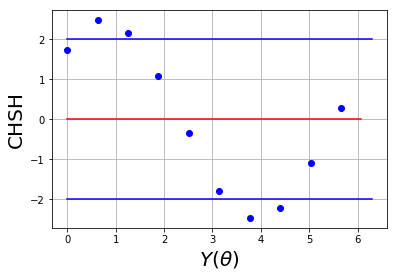

In [10]:
plt.plot(xdata, CHSH_data_sim, 'r-', xdata2, CHSH_data_real, 'bo')
plt.plot([0, 2*np.pi], [2, 2], 'b-')
plt.plot([0, 2*np.pi], [-2, -2], 'b-')
plt.grid()
plt.ylabel('CHSH', fontsize=20)
plt.xlabel(r'$Y(\theta)$', fontsize=20)
plt.show()

The resulting graph created by running the previous cell compares the simulated data (sinusoidal line) and the data from the real experiment. The graph also gives lines at $\pm 2$ for reference. Did you violate the hidden variable model?

Here is the saved CHSH data. 

In [11]:
print(CHSH_data_real)

[1.7265625, 2.48046875, 2.166015625, 1.09375, -0.341796875, -1.791015625, -2.46484375, -2.212890625, -1.1015625, 0.291015625]


Despite the presence of loopholes in our demonstration, we can see that this experiment is compatible with quantum mechanics as a theory with no local hidden variables. See the original experimental demonstrations of this test with superconducting qubits [here](https://arstechnica.com/science/2017/05/quantum-volume-one-number-to-benchmark-a-quantum-computer/) and [here](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.81.062325).

In [13]:
CHSH_data_sim

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

## GHZ state

What does entanglement look like going beyond two qubits? An important set of maxially entangled states are known as GHZ states (named after Greenberger Horne and Zeilinger). These are the states of the form 
$|\psi\rangle = \left (|0...0\rangle+|1...1\rangle\right)/\sqrt{2}$. The Bell state previously described is obviously a 2-qubit version of a GHZ state. The next cells prepare GHZ states of 2, 3, and 4 qubits. 

In [ ]:
# 2 - qubits 
shots = 8192
device = 'ibmqx2'
# device = 'simulator' # the device test purpose 

#quantum circuit to make GHZ state
q = Q_program.create_quantum_registers("q", 2)
c = Q_program.create_classical_registers("c", 2)
ghz = Q_program.create_circuit("ghz", ["q"], ["c"])
ghz.h(q[0])
ghz.cx(q[0],q[1])

# quantum circuit to measure q in standard basis 
measureZZ = Q_program.create_circuit("measureZZ", ["q"], ["c"])
measureZZ.measure(q[0], c[0])
measureZZ.measure(q[1], c[1])

measureXX = Q_program.create_circuit("measureXX", ["q"], ["c"])
measureXX.h(q[0])
measureXX.h(q[1])
measureXX.measure(q[0], c[0])
measureXX.measure(q[1], c[1])

circuits = [ghz+measureZZ, ghz+measureXX]

### ERROR print(Q_program.program_to_text(circuits))

results = Q_program.execute(circuits, device, shots, max_credits=5, wait=10, timeout=240) 

plot_histogram(Q_program.get_counts(0))
plot_histogram(Q_program.get_counts(1))

In [ ]:
# 3 - qubits 
shots = 8192
#quantum circuit to make GHZ state 
q = Q_program.create_quantum_registers("q", 3)
c = Q_program.create_classical_registers("c", 3)
ghz = Q_program.create_circuit("ghz", ["q"], ["c"])
ghz.h(q[0])
ghz.cx(q[0],q[1])
ghz.cx(q[1],q[2])

# quantum circuit to measure q in standard basis 
measureZZZ = Q_program.create_circuit("measureZZZ", ["q"], ["c"])
measureZZZ.measure(q[0], c[0])
measureZZZ.measure(q[1], c[1])
measureZZZ.measure(q[2], c[2])

measureXXX = Q_program.create_circuit("measureXXX", ["q"], ["c"])
measureXXX.h(q[0])
measureXXX.h(q[1])
measureXXX.h(q[2])
measureXXX.measure(q[0], c[0])
measureXXX.measure(q[1], c[1])
measureXXX.measure(q[2], c[2])

circuits = [ghz+measureZZZ, ghz+measureXXX]

#ERROR print(Q_program.program_to_text(circuits))

results = Q_program.execute(circuits, device, shots, max_credits=5, wait=10, timeout=240) 

plot_histogram(Q_program.get_counts(0))
plot_histogram(Q_program.get_counts(1))

In [ ]:
# 4 - qubits 
shots = 8192
#quantum circuit to make GHZ state 
q = Q_program.create_quantum_registers("q", 4)
c = Q_program.create_classical_registers("c", 4)
ghz = Q_program.create_circuit("ghz", ["q"], ["c"])
ghz.h(q[0])
ghz.cx(q[0],q[1])
ghz.cx(q[1],q[2])
ghz.h(q[3])
ghz.h(q[2])
ghz.cx(q[3],q[2])
ghz.h(q[3])
ghz.h(q[2])

# quantum circuit to measure q in standard basis 
measureZZZZ = Q_program.create_circuit("measureZZZZ", ["q"], ["c"])
measureZZZZ.measure(q[0], c[0])
measureZZZZ.measure(q[1], c[1])
measureZZZZ.measure(q[2], c[2])
measureZZZZ.measure(q[3], c[3])

measureXXXX = Q_program.create_circuit("measureXXXX", ["q"], ["c"])
measureXXXX.h(q[0])
measureXXXX.h(q[1])
measureXXXX.h(q[2])
measureXXXX.h(q[3])
measureXXXX.measure(q[0], c[0])
measureXXXX.measure(q[1], c[1])
measureXXXX.measure(q[2], c[2])
measureXXXX.measure(q[3], c[3])

circuits = [ghz+measureZZZZ, ghz+measureXXXX]

## ERROR print(Q_program.program_to_text(circuits))

results = Q_program.execute(circuits, device, shots, max_credits=5, wait=10, timeout=240) 

plot_histogram(Q_program.get_counts(0))
plot_histogram(Q_program.get_counts(1))

## Mermin's test and the three box game
In case the violation of Bell's inequality (CHSH) by two qubits is not enough for you to believe in quantum mechanics, we can generalize to a more stringent set of tests with three qubits which can give a single shot violation (rather than taking averaged statistics). A well-known three-qubit case is Mermin's inequality, which is a test we can perform on GHZ states as we just introduced in the previously section. 

An example of a three-qubit GHZ state is $|\psi\rangle = \left (|000\rangle+|111\rangle\right)/\sqrt{2}$. You can see this is a further generalization of a Bell-state and if measured, should give $|000\rangle$ half the time and $|111 \rangle$ the other half of the time.

In [ ]:
#quantum circuit to make GHZ state 
q = Q_program.create_quantum_registers("q", 3)
c = Q_program.create_classical_registers("c", 3)
ghz = Q_program.create_circuit("ghz", ["q"], ["c"])
ghz.h(q[0])
ghz.cx(q[0],q[1])
ghz.cx(q[0],q[2])

# quantum circuit to measure q in standard basis 
measureZZZ = Q_program.create_circuit("measureZZZ", ["q"], ["c"])
measureZZZ.measure(q[0], c[0])
measureZZZ.measure(q[1], c[1])
measureZZZ.measure(q[2], c[2])

circuits = [ghz+measureZZZ]

## ERROR print(Q_program.program_to_text(circuits))

results = Q_program.execute(circuits, device, shots, max_credits=5, wait=10, timeout=240) 

plot_histogram(Q_program.get_counts(0))

Now suppose we have three independent systems,$\{A,B,C\}$, for which we can query two particular questions (observables) $X$ and $Y$. In each case, either query can give $+1$ or $-1$. Is it possible to choose some state of the three boxes such that we can satisfy the following four conditions, $X_A Y_B Y_C = 1$, $Y_A X_B Y_C =1$, $Y_A Y_B X_C = 1$, and $X_A X_B X_C = -1$. Choosing classical states, this can be shown to be impossible. Yet a 3-qubit GHZ state can satsify all four conditions.

In [ ]:
MerminM = lambda x : x[0]*x[1]*x[2]*x[3]

In [ ]:
observable ={'00000': 1, '00001': -1, '00010': -1, '00011': 1, '00100': -1, '00101': 1, '00110': 1, '00111': -1}

In [ ]:
# quantum circuit to measure q XXX 
measureXXX = Q_program.create_circuit("measureXXX", ["q"], ["c"])
measureXXX.h(q[0])
measureXXX.h(q[1])
measureXXX.h(q[2])
measureXXX.measure(q[0], c[0])
measureXXX.measure(q[1], c[1])
measureXXX.measure(q[2], c[2])

# quantum circuit to measure q XYY
measureXYY = Q_program.create_circuit("measureXYY", ["q"], ["c"])
measureXYY.s(q[1]).inverse()
measureXYY.s(q[2]).inverse()
measureXYY.h(q[0])
measureXYY.h(q[1])
measureXYY.h(q[2])
measureXYY.measure(q[0], c[0])
measureXYY.measure(q[1], c[1])
measureXYY.measure(q[2], c[2])

# quantum circuit to measure q YXY
measureYXY = Q_program.create_circuit("measureYXY", ["q"], ["c"])
measureYXY.s(q[0]).inverse()
measureYXY.s(q[2]).inverse()
measureYXY.h(q[0])
measureYXY.h(q[1])
measureYXY.h(q[2])
measureYXY.measure(q[0], c[0])
measureYXY.measure(q[1], c[1])
measureYXY.measure(q[2], c[2])

# quantum circuit to measure q YYX
measureYYX = Q_program.create_circuit("measureYYX", ["q"], ["c"])
measureYYX.s(q[0]).inverse()
measureYYX.s(q[1]).inverse()
measureYYX.h(q[0])
measureYYX.h(q[1])
measureYYX.h(q[2])
measureYYX.measure(q[0], c[0])
measureYYX.measure(q[1], c[1])
measureYYX.measure(q[2], c[2])

circuits = [ghz+measureXXX,ghz+measureYYX,ghz+measureYXY,ghz+measureXYY]

results = Q_program.execute(circuits, device, shots, max_credits=5, wait=10, timeout=240) 

In [ ]:
temp=[]
temp.append(Q_program.average_data(0,observable))
temp.append(Q_program.average_data(1,observable))
temp.append(Q_program.average_data(2,observable))
temp.append(Q_program.average_data(3,observable))
print(temp)
print(MerminM(temp))

The above shows that the average statistics are not consistent with a local hidden variable theory. To show it with single shots below we run 50 single experiments with each experiment chosen randomly and the outcomes are saved. If there was a local hidden variable theory all of these outcomes would be $+1$.

In [ ]:
device = 'IBMQX5qv2'
shots = 1

program_singleshot=[]
for j in range(0, 50):
    r=np.random.randint(4)
    program_singleshot.append(circuits[r])
    

In [ ]:
results = Q_program.execute(program_singleshot, device, shots, max_credits=3, wait=10, timeout=240)

In [ ]:
temp=[]
for j in range(0, 50):
    temp.append(Q_program.average_data(j,observable))

In [ ]:
outcomes = np.histogram(temp,bins=2)
outcomes